In [32]:
import pandas as pd

data = [
    [250, 0.7122, 0.6701, 0.6438],
    [1000, 0.9069, 0.8633, 0.8085],
    [10000, 0.9637, 0.9546, 0.9188],
    [100000, 0.9746, 0.9670, 0.9412],
    [375000, 0.9805, 0.9729, 0.9529],
]
table = pd.DataFrame(data, columns=['dataset', 'PER', 'LOC', 'ORG'])
table['f1'] = table[['PER', 'LOC', 'ORG']].mean(axis=1)

real = (0.97 + 0.91 + 0.85) / 3
synt = table.f1.values[-1]
table['f1'] = table.f1 / (synt / real)

large = 0.92
table

,dataset,PER,LOC,ORG,f1
0,250,0.7122,0.6701,0.6438,0.634398
1,1000,0.9069,0.8633,0.8085,0.807424
2,10000,0.9637,0.9546,0.9188,0.888333
3,100000,0.9746,0.9670,0.9412,0.902642
4,375000,0.9805,0.9729,0.9529,0.910000


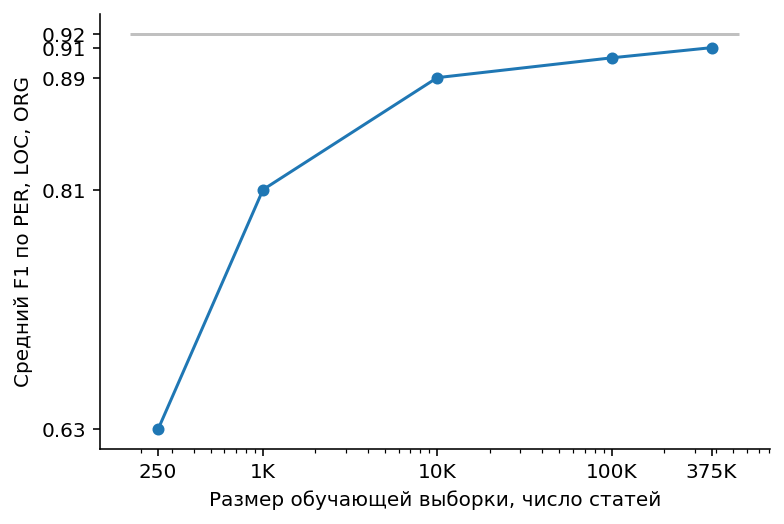

In [76]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.plot(table.dataset, table.f1, color='#1f77b4', marker='o', markersize=5)
ax.set_xscale('log')

ax.set_xticks(table.dataset)
ax.set_xticklabels(table.dataset)

values = table.f1.values.tolist()
values.pop(-2)  # does not fit
values.append(large)
ax.set_yticks(values)
ax.set_yticklabels(['%.2f' % _ for _ in values])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

min, max = ax.get_xlim()
ax.hlines(large, min, max, color='silver')

ax.set_xlabel('Размер обучающей выборки, число статей')
ax.set_ylabel('Средний F1 по PER, LOC, ORG')

fig.savefig('images/size.svg', bbox_inches='tight', transparent=True, pad_inches=0)